In [1]:
from utils_rough_pde import *
import matplotlib.pyplot as plt

# For Jupyter Notebook, use HTML to display the animation
from IPython.display import HTML

In [2]:
L = 1
x = jnp.linspace(0, L, 2000)

In [3]:
 # Construct the measurements
n_meas = 25
# Boundary of the domain
lower, upper = 0.0, 1.0

epsilon_values =  jnp.array([1/(n_meas*2)])
loc_values = jnp.linspace(lower + epsilon_values[0], upper - epsilon_values[0],  int(L/(2*epsilon_values[0])))
support = jnp.array([loc_values - epsilon_values[0], loc_values + epsilon_values[0]]).T
vol = support[:,1] - support[:,0]
N_test_functions = loc_values.shape[0]



# loc_values = jnp.linspace(lower + epsilon_values[0], upper - epsilon_values[0],  int(L/(2*epsilon_values[0])))
# support = jnp.array([loc_values - epsilon_values[0], loc_values + epsilon_values[0]]).T
# vol = support[:,1] - support[:,0]
# N_test_functions = loc_values.shape[0]

print("Number of test functions: ", N_test_functions)

Number of test functions:  25


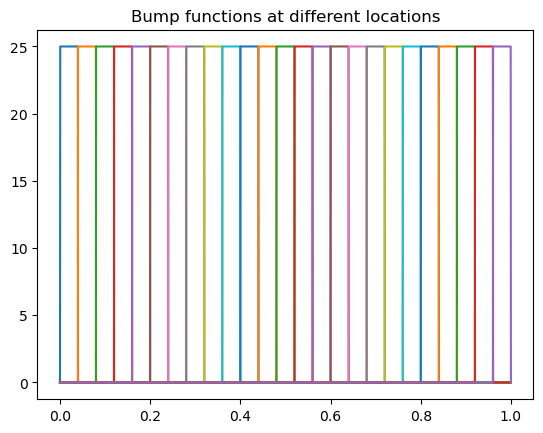

In [4]:
bump_values = vmap_indicator(x, epsilon_values, loc_values)

for i, loc in enumerate(loc_values):
    plt.plot(x, bump_values[:, 0, i])
plt.title("Bump functions at different locations")
plt.show()

In [5]:
def build_max_min_ordering(X, initial_points):
    dist_matrix = squareform(pdist(X))

    # We include a set of initial points (can be boundary points, chosen at random or whatever). These should be indices of the points in X
    idx_order = initial_points

    idx_left = jnp.arange(X.shape[0]).tolist()
    # Remove the initial points from the list of points to order
    idx_left = [x for x in idx_left if x not in idx_order]


    # Compute the current max min distance 
    dist_temp = dist_matrix[idx_order, :]
    score_list = [ jnp.max(jnp.min(dist_temp, axis = 0), axis = -1).item()]

    for i in range(len(idx_left)):
        best_score = jnp.inf
        best_idx = 0
        for j in range(len(idx_left)):
            current_idx = idx_left[j]
            temp_idx =idx_order.copy()
            temp_idx.append(current_idx)
            dist_temp = dist_matrix[temp_idx, :]

            
            current_score = jnp.max(jnp.min(dist_temp, axis = 0), axis = -1)
            if current_score < best_score:
                best_score = current_score
                best_j = j

        # Add the current score to the list
        score_list.append(best_score.item())
        # Add the selected point to the ordering
        idx_order.append(idx_left[best_j])
        # Remove the selected point from the distance matrix
        idx_left.remove(idx_left[best_j])
    return idx_order, score_list

In [6]:
def build_max_min_ordering(X, initial_points):
    print(X)
    dist_matrix = squareform(pdist(X))

    # We include a set of initial points (can be boundary points, chosen at random or whatever). These should be indices of the points in X
    idx_order = initial_points
    #idx_left = jnp.setdiff1d(jnp.arange(X.shape[0]), jnp.array(idx_order)).tolist()



    for i in range(X.shape[0] - len(initial_points)):
        # Compute the current max min distance
        dist_temp = dist_matrix[idx_order, :]
        dist_temp = jnp.min(dist_temp, axis = 0)
        #print(dist_temp)
        # Find the point that maximizes the min distance
        best_j = jnp.argmax(dist_temp).item()
        idx_order.append(best_j)

        

    return jnp.array(idx_order)

In [7]:
from jax import random
def build_max_min_ordering(X, initial_points):
    dist_matrix = squareform(pdist(X))

    # We include a set of initial points (can be boundary points, chosen at random or whatever). These should be indices of the points in X
    idx_order = initial_points
    #idx_left = jnp.setdiff1d(jnp.arange(X.shape[0]), jnp.array(idx_order)).tolist()
    key = random.PRNGKey(23)



    for i in range(X.shape[0] - len(initial_points)):
        print(idx_order)
        key, subkey = random.split(key)
        # Compute the current max min distance
        dist_temp = dist_matrix[idx_order, :]
        dist_temp = jnp.min(dist_temp, axis = 0)
        #print(dist_temp)

        # Find all the points that maximizes the min distance
        max_values = dist_temp.max()
        max_indices = jnp.where(dist_temp == max_values)[0]
        # Select one at random
        best_j = random.choice(subkey, max_indices).item()
        idx_order.append(best_j)

        

    return jnp.array(idx_order)

In [8]:

loc_values_boundary = jnp.hstack([jnp.array([lower, upper]), loc_values])


# Our initial points will be the boundary points
max_min_order = build_max_min_ordering(loc_values_boundary[:, None],[0,1])
max_min_order = max_min_order[2:] -2
print(max_min_order)


[0, 1]
[0, 1, 14]
[0, 1, 14, 20]
[0, 1, 14, 20, 8]
[0, 1, 14, 20, 8, 5]
[0, 1, 14, 20, 8, 5, 11]
[0, 1, 14, 20, 8, 5, 11, 17]
[0, 1, 14, 20, 8, 5, 11, 17, 23]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4, 13]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4, 13, 12]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4, 13, 12, 9]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4, 13, 12, 

In [9]:
max_min_order

Array([12, 18,  6,  3,  9, 15, 21,  1, 23, 19, 17, 22, 14,  8,  4,  5,  2,
       11, 10,  7, 16, 13, 20, 24,  0], dtype=int64)

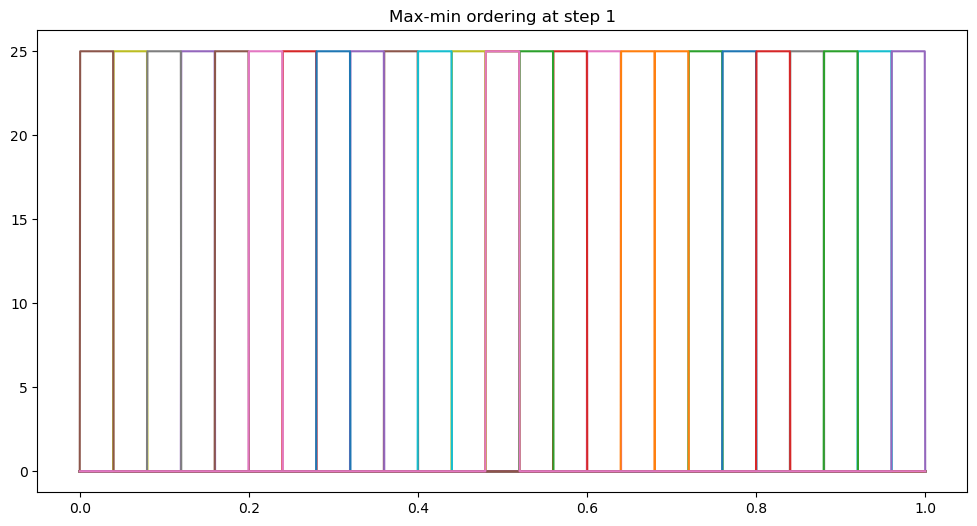

In [10]:

# Plot an animation of the ordering
from matplotlib.animation import FuncAnimation

def update(i):

    ax.plot(x, bump_values[:, 0, max_min_order[i]])

    ax.set_title(f"Max-min ordering at step {i+1}")


# Initialize the plot
fig, ax = plt.subplots(figsize = (12,6))

animation = FuncAnimation(fig, update, frames=len(max_min_order), interval=500, repeat=False)
HTML(animation.to_jshtml())

# Buid nested measurements

In [19]:
meas_exp = jnp.arange(0, 11)

for i in meas_exp:
    
    n_meas = int(2**i)

    # Construct the measurements
    epsilon_values =  jnp.array([1/(n_meas*2)])
    loc_values = jnp.linspace(lower + epsilon_values[0], upper - epsilon_values[0],  int(L/(2*epsilon_values[0])))
    support = jnp.array([loc_values - epsilon_values[0], loc_values + epsilon_values[0]]).T
    vol = support[:,1] - support[:,0]
    N_test_functions = loc_values.shape[0]

    print("Number of test functions: ", N_test_functions)

    bump_values = vmap_indicator(x, epsilon_values, loc_values)

    print(bump_values.shape)

Number of test functions:  1
(2000, 1, 1)
Number of test functions:  2
(2000, 1, 2)
Number of test functions:  4
(2000, 1, 4)
Number of test functions:  8
(2000, 1, 8)
Number of test functions:  16
(2000, 1, 16)
Number of test functions:  32
(2000, 1, 32)
Number of test functions:  64
(2000, 1, 64)
Number of test functions:  128
(2000, 1, 128)
Number of test functions:  256
(2000, 1, 256)
Number of test functions:  512
(2000, 1, 512)
Number of test functions:  1024
(2000, 1, 1024)


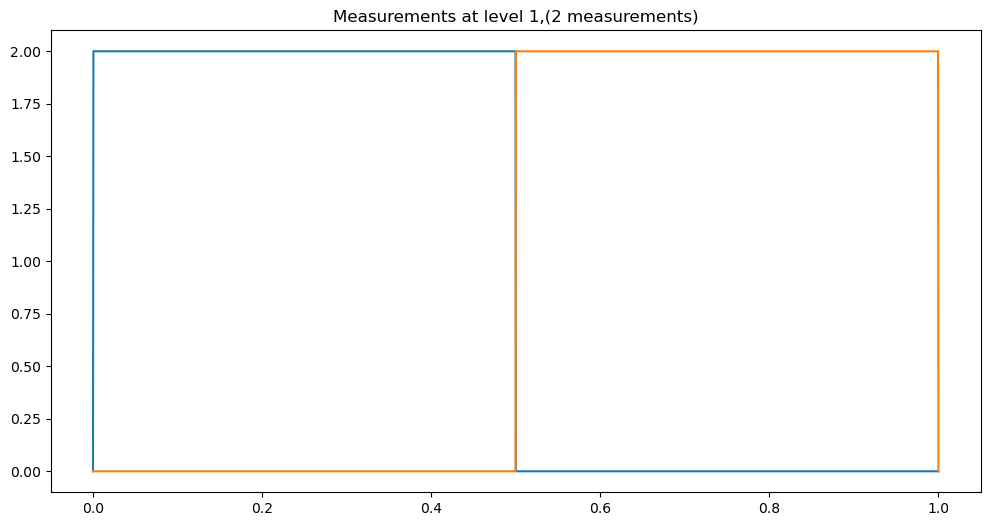

In [36]:

# Plot an animation of the nested measurements
from matplotlib.animation import FuncAnimation

def update(i):
    n_meas = int(2**i)

    # Construct the measurements
    epsilon_values =  jnp.array([1/(n_meas*2)])
    loc_values = jnp.linspace(lower + epsilon_values[0], upper - epsilon_values[0],  int(L/(2*epsilon_values[0])))
    support = jnp.array([loc_values - epsilon_values[0], loc_values + epsilon_values[0]]).T
    vol = support[:,1] - support[:,0]

    bump_values = vmap_indicator(x, epsilon_values, loc_values)

    ax.clear()

    ax.plot(x, bump_values[:, 0, :])

    ax.set_title(f"Measurements at level {i} ({n_meas} measurements)")


# Initialize the plot
fig, ax = plt.subplots(figsize = (12,6))

animation = FuncAnimation(fig, update, frames=jnp.arange(1, 11), interval=500, repeat=False)
HTML(animation.to_jshtml())

In [25]:
meas_exp = jnp.arange(1, 11)

for i in meas_exp:
    
    n_meas = int(2**i -1)

    diracs = jnp.linspace(lower, upper, n_meas)

    print(diracs.shape)

(1,)
(3,)
(7,)
(15,)
(31,)
(63,)
(127,)
(255,)
(511,)
(1023,)


[0.5]
[0.5]
[0.25 0.5  0.75]
[0.125 0.25  0.375 0.5   0.625 0.75  0.875]
[0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625 0.625
 0.6875 0.75   0.8125 0.875  0.9375]
[0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25    0.28125
 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125 0.5625
 0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125  0.84375
 0.875   0.90625 0.9375  0.96875]
[0.015625 0.03125  0.046875 0.0625   0.078125 0.09375  0.109375 0.125
 0.140625 0.15625  0.171875 0.1875   0.203125 0.21875  0.234375 0.25
 0.265625 0.28125  0.296875 0.3125   0.328125 0.34375  0.359375 0.375
 0.390625 0.40625  0.421875 0.4375   0.453125 0.46875  0.484375 0.5
 0.515625 0.53125  0.546875 0.5625   0.578125 0.59375  0.609375 0.625
 0.640625 0.65625  0.671875 0.6875   0.703125 0.71875  0.734375 0.75
 0.765625 0.78125  0.796875 0.8125   0.828125 0.84375  0.859375 0.875
 0.890625 0.90625  0.921875 0.9375   0.953125 0.96875  0.984375]
[0.0078125 0.0156

[0.5]


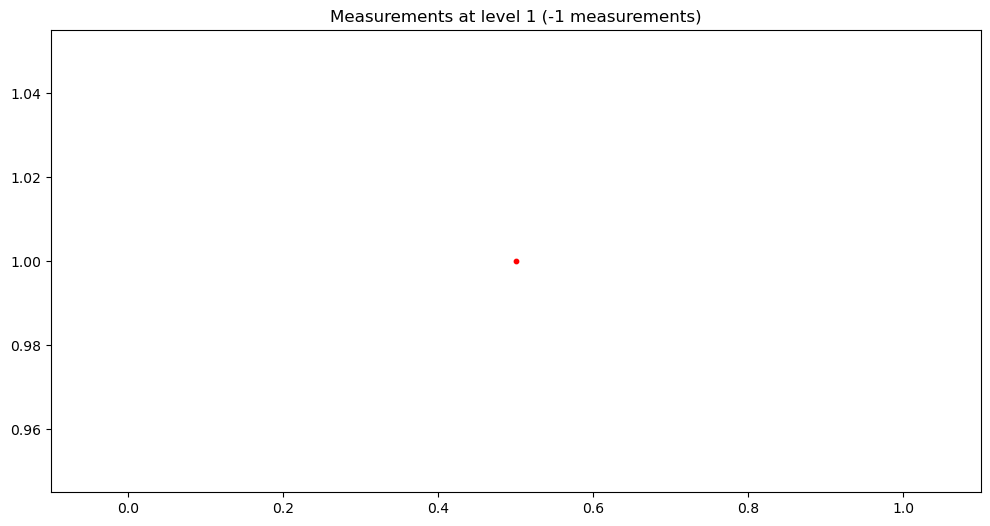

In [44]:
def update(i):
    n_meas = int(2**i +1)
    diracs = jnp.linspace(lower, upper, n_meas)[1:-1]
    print(diracs)


    ax.clear()
    ax.scatter(diracs, jnp.ones(diracs.shape[0]), s = 10, c = "red")
    ax.set_xlim(lower- 0.1, upper+0.1)

    ax.set_title(f"Measurements at level {i} ({diracs.shape[0] -2} measurements)")


# Initialize the plot
fig, ax = plt.subplots(figsize = (12,6))

animation = FuncAnimation(fig, update, frames=jnp.arange(1, 11), interval=500, repeat=False)
HTML(animation.to_jshtml())